In [1]:
import os
import numpy as np
import cv2 
from random import shuffle
from tqdm import tqdm  
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
from collections import Counter

In [2]:
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


covid_dir ="/Users/manishkumarsah/Documents/Jupiter notebook/archive/COVID" # Directory containing COVID images
non_covid_dir = "/Users/manishkumarsah/Documents/Jupiter notebook/archive/non-COVID"  # Directory containing non-COVID images

# Collect paths and labels for COVID images
covid_paths = [os.path.join(covid_dir, filename) for filename in os.listdir(covid_dir)]
covid_labels = ['COVID'] * len(covid_paths)

# Collect paths and labels for non-COVID images
non_covid_paths = [os.path.join(non_covid_dir, filename) for filename in os.listdir(non_covid_dir)]
non_covid_labels = ['non-COVID'] * len(non_covid_paths)

# Combine COVID and non-COVID data
all_paths = covid_paths + non_covid_paths
all_labels = covid_labels + non_covid_labels

# Shuffle the data
all_paths, all_labels = shuffle(all_paths, all_labels, random_state=42)

# Split the data into training and testing sets
train_dir, test_dir, train_labels, test_labels = train_test_split(all_paths, all_labels, test_size=0.2, random_state=42)

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the source directories
covid_dir = "/Users/manishkumarsah/Documents/Jupiter notebook/archive/COVID"
non_covid_dir = "/Users/manishkumarsah/Documents/Jupiter notebook/archive/non-COVID"

# Define the destination directories for the organized data
train_dir = "/Users/manishkumarsah/Documents/Jupiter notebook/archive/train"
test_dir = "/Users/manishkumarsah/Documents/Jupiter notebook/archive/test"

# Create class-specific subdirectories in the destination directories
for class_dir in ["COVID", "non-COVID"]:
    os.makedirs(os.path.join(train_dir, class_dir), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_dir), exist_ok=True)

# Split the data into train and test
covid_images = os.listdir(covid_dir)
non_covid_images = os.listdir(non_covid_dir)

covid_train, covid_test = train_test_split(covid_images, test_size=0.2, random_state=42)
non_covid_train, non_covid_test = train_test_split(non_covid_images, test_size=0.2, random_state=42)

# Move the images to the train and test directories
for filename in covid_train:
    source_path = os.path.join(covid_dir, filename)
    destination_path = os.path.join(train_dir, "COVID", filename)
    shutil.copy(source_path, destination_path)

for filename in covid_test:
    source_path = os.path.join(covid_dir, filename)
    destination_path = os.path.join(test_dir, "COVID", filename)
    shutil.copy(source_path, destination_path)

for filename in non_covid_train:
    source_path = os.path.join(non_covid_dir, filename)
    destination_path = os.path.join(train_dir, "non-COVID", filename)
    shutil.copy(source_path, destination_path)

for filename in non_covid_test:
    source_path = os.path.join(non_covid_dir, filename)
    destination_path = os.path.join(test_dir, "non-COVID", filename)
    shutil.copy(source_path, destination_path)

In [4]:
NUM_TRAINING_IMAGES = len(train_dir)
print(NUM_TRAINING_IMAGES)

62


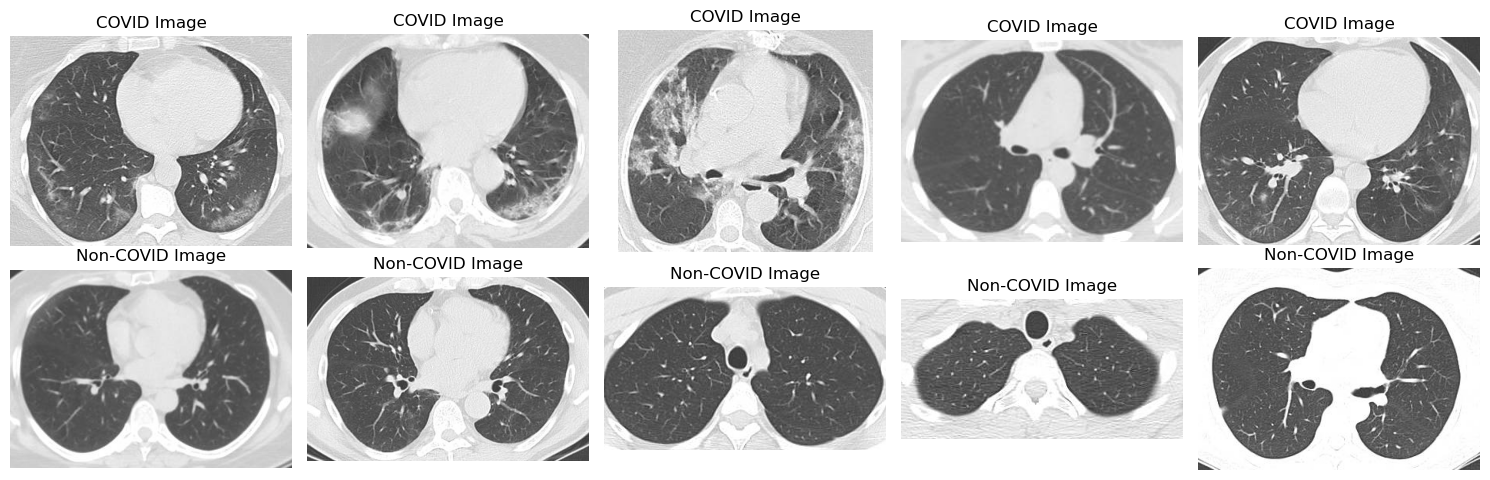

In [5]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the directories containing COVID and non-COVID images
covid_directory = "/Users/manishkumarsah/Documents/Jupiter notebook/archive/COVID"
non_covid_directory = "/Users/manishkumarsah/Documents/Jupiter notebook/archive/non-COVID"

# Get a list of image file names from each directory
covid_images = os.listdir(covid_directory)
non_covid_images = os.listdir(non_covid_directory)

# Randomly select 5 images from each category
random_covid_images = random.sample(covid_images, 5)
random_non_covid_images = random.sample(non_covid_images, 5)

# Plot COVID images
plt.figure(figsize=(15, 5))
for i, image_name in enumerate(random_covid_images):
    plt.subplot(2, 5, i + 1)
    img = mpimg.imread(os.path.join(covid_directory, image_name))
    plt.imshow(img)
    plt.axis('off')
    plt.title('COVID Image')

# Plot non-COVID images
for i, image_name in enumerate(random_non_covid_images):
    plt.subplot(2, 5, i + 6)
    img = mpimg.imread(os.path.join(non_covid_directory, image_name))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Non-COVID Image')

plt.tight_layout()
plt.show()


In [6]:
# https://gist.github.com/fchollet/7eb39b44eb9e16e59632d25fb3119975
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
# https://medium.com/analytics-vidhya/data-augmentation-is-it-really-necessary-b3cb12ab3c3f

image_size = 224 
BATCH_SIZE = 16 
STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE

data_path = '/Users/manishkumarsah/Documents/Jupiter notebook/archive/'

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(data_path + '/train',
                                                 target_size = (image_size, image_size),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

testing_set = test_datagen.flow_from_directory(data_path + '/test',
                                            target_size = (image_size, image_size),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical',
                                            shuffle = True)

Found 1984 images belonging to 2 classes.
Found 497 images belonging to 2 classes.


In [7]:
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/Sequence
print("train batch ", training_set.__getitem__(0)[0].shape)
print("test batch ", testing_set.__getitem__(0)[0].shape)
print("sample train label \n", training_set.__getitem__(0)[1][:5])

train batch  (16, 224, 224, 3)
test batch  (16, 224, 224, 3)
sample train label 
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [8]:
training_set.class_indices

{'COVID': 0, 'non-COVID': 1}

In [9]:
testing_set.class_indices

{'COVID': 0, 'non-COVID': 1}

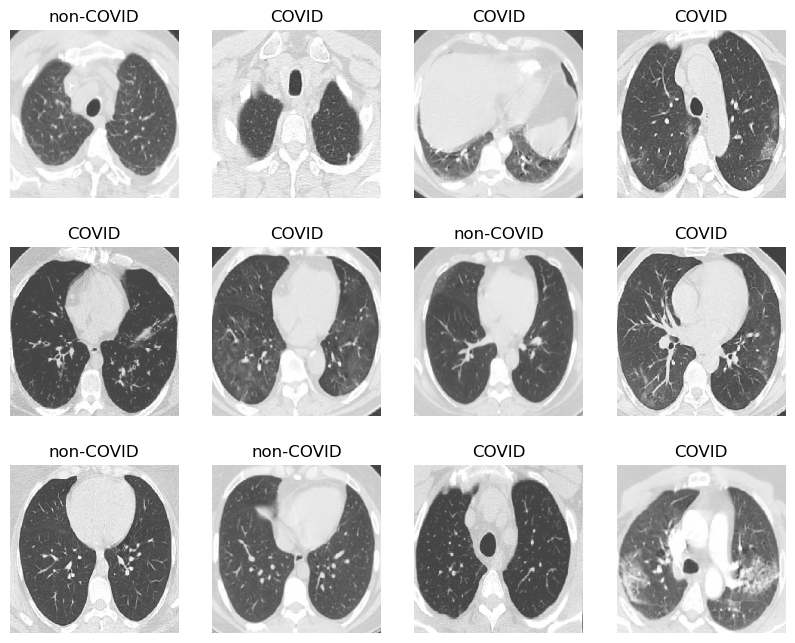

In [10]:
labels = ['COVID', 'non-COVID',]

sample_data = testing_set.__getitem__(3)[0] 
sample_label = testing_set.__getitem__(3)[1] 

plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.axis('off')
    plt.imshow(sample_data[i])
    plt.title(labels[np.argmax(sample_label[i])])
    

In [11]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

In [12]:
# https://keras.io/examples/vision/grad_cam/
from tensorflow import keras
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap, top_pred_index.numpy()

In [13]:
# https://keras.io/examples/vision/grad_cam/
def superimposed_img(image, heatmap):
    # We rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # We use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # We use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # We create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((image_size, image_size))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * 0.4 + image
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    return superimposed_img

In [14]:
# label smoothing https://www.linkedin.com/pulse/label-smoothing-solving-overfitting-overconfidence-code-sobh-phd/
def categorical_smooth_loss(y_true, y_pred, label_smoothing=0.1):
    loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred, label_smoothing=label_smoothing)
    return loss

In [15]:
# training call backs 
lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, epsilon=0.0001, patience=3, verbose=1)
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [16]:
def create_model():
    pretrained_vgg =tf.keras.applications.MobileNetV2(input_shape=(image_size, image_size, 3), weights='imagenet', include_top=False)
#     for layer in pretrained_vgg.layers:
#         layer.trainable = False
    x3 = pretrained_vgg.output
    x3 = tf.keras.layers.AveragePooling2D(name="averagepooling2d_head")(x3)
    x3 = tf.keras.layers.Flatten(name="flatten_head")(x3)
    x3 = tf.keras.layers.Dense(128, activation="relu", name="dense_head")(x3)
    x3 = tf.keras.layers.Dropout(0.5, name="dropout_head")(x3)
    x3 = tf.keras.layers.Dense(64, activation="relu", name="dense_head_2")(x3)
    x3 = tf.keras.layers.Dropout(0.5, name="dropout_head_2")(x3)
    model_out = tf.keras.layers.Dense(2, activation='softmax', name="predictions_head")(x3)

    model_vgg = Model(inputs=pretrained_vgg.input, outputs=model_out)

    return model_vgg

model_vgg = create_model()

model_vgg.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [17]:
model_vgg = create_model()
model_vgg.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),metrics=['accuracy'])

In [18]:
history_vgg = model_vgg.fit(training_set, validation_data=testing_set, callbacks=[lr_reduce, es_callback], epochs=10)

Epoch 1/10
124/124 [==============================] - 182s 1s/step - loss: 0.7688 - accuracy: 0.6618 - val_loss: 0.9089 - val_accuracy: 0.5231 - lr: 1.0000e-04
Epoch 2/10
124/124 [==============================] - 166s 1s/step - loss: 0.4774 - accuracy: 0.8286 - val_loss: 1.4355 - val_accuracy: 0.5070 - lr: 1.0000e-04
Epoch 3/10
124/124 [==============================] - 158s 1s/step - loss: 0.4056 - accuracy: 0.8901 - val_loss: 1.2897 - val_accuracy: 0.5211 - lr: 1.0000e-04
Epoch 4/10
124/124 [==============================] - ETA: 0s - loss: 0.3511 - accuracy: 0.9299
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
124/124 [==============================] - 157s 1s/step - loss: 0.3511 - accuracy: 0.9299 - val_loss: 1.3037 - val_accuracy: 0.5412 - lr: 1.0000e-04
Epoch 5/10
124/124 [==============================] - 208s 2s/step - loss: 0.3328 - accuracy: 0.9456 - val_loss: 1.0379 - val_accuracy: 0.5795 - lr: 5.0000e-05
Epoch 6/10
124/124 [===================

In [19]:
model_vgg.save('model_vgg.h5')

/Users/manishkumarsah/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


/var/folders/y5/rtj234dj2pl_fy4zgx8wz5tm0000gn/T/ipykernel_45078/4283597964.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


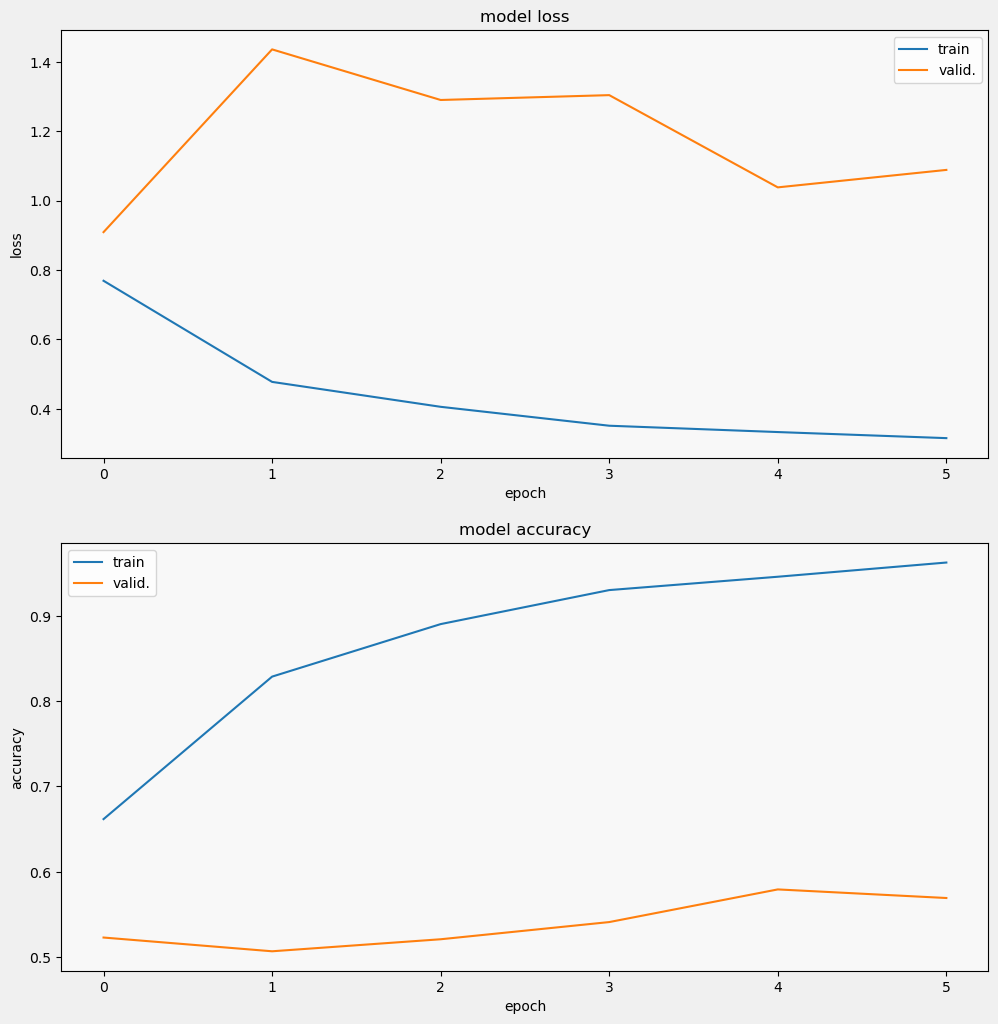

In [20]:
display_training_curves(history_vgg.history['loss'], history_vgg.history['val_loss'], 'loss', 211)
display_training_curves(history_vgg.history['accuracy'], history_vgg.history['val_accuracy'], 'accuracy', 212)

In [21]:
model_vgg_load = tf.keras.models.load_model('model_vgg.h5')

In [22]:

out_put = model_vgg_load.predict(np.expand_dims(sample_data[0], axis=0))

1/1 [==============================] - 1s 648ms/step


In [23]:
labels[np.argmax(out_put)]

'non-COVID'

In [24]:
sample_label[0]

array([0., 1.], dtype=float32)

In [25]:
last_conv_layer_name = "block5_pool"
classifier_layer_names = [
    "averagepooling2d_head",
    "flatten_head",
    "dense_head",
    "dropout_head",
    "dense_head_2",
    "dropout_head_2",
    "predictions_head"
]

ValueError: No such layer: block5_pool. Existing layers are: ['input_2', 'Conv1', 'bn_Conv1', 'Conv1_relu', 'expanded_conv_depthwise', 'expanded_conv_depthwise_BN', 'expanded_conv_depthwise_relu', 'expanded_conv_project', 'expanded_conv_project_BN', 'block_1_expand', 'block_1_expand_BN', 'block_1_expand_relu', 'block_1_pad', 'block_1_depthwise', 'block_1_depthwise_BN', 'block_1_depthwise_relu', 'block_1_project', 'block_1_project_BN', 'block_2_expand', 'block_2_expand_BN', 'block_2_expand_relu', 'block_2_depthwise', 'block_2_depthwise_BN', 'block_2_depthwise_relu', 'block_2_project', 'block_2_project_BN', 'block_2_add', 'block_3_expand', 'block_3_expand_BN', 'block_3_expand_relu', 'block_3_pad', 'block_3_depthwise', 'block_3_depthwise_BN', 'block_3_depthwise_relu', 'block_3_project', 'block_3_project_BN', 'block_4_expand', 'block_4_expand_BN', 'block_4_expand_relu', 'block_4_depthwise', 'block_4_depthwise_BN', 'block_4_depthwise_relu', 'block_4_project', 'block_4_project_BN', 'block_4_add', 'block_5_expand', 'block_5_expand_BN', 'block_5_expand_relu', 'block_5_depthwise', 'block_5_depthwise_BN', 'block_5_depthwise_relu', 'block_5_project', 'block_5_project_BN', 'block_5_add', 'block_6_expand', 'block_6_expand_BN', 'block_6_expand_relu', 'block_6_pad', 'block_6_depthwise', 'block_6_depthwise_BN', 'block_6_depthwise_relu', 'block_6_project', 'block_6_project_BN', 'block_7_expand', 'block_7_expand_BN', 'block_7_expand_relu', 'block_7_depthwise', 'block_7_depthwise_BN', 'block_7_depthwise_relu', 'block_7_project', 'block_7_project_BN', 'block_7_add', 'block_8_expand', 'block_8_expand_BN', 'block_8_expand_relu', 'block_8_depthwise', 'block_8_depthwise_BN', 'block_8_depthwise_relu', 'block_8_project', 'block_8_project_BN', 'block_8_add', 'block_9_expand', 'block_9_expand_BN', 'block_9_expand_relu', 'block_9_depthwise', 'block_9_depthwise_BN', 'block_9_depthwise_relu', 'block_9_project', 'block_9_project_BN', 'block_9_add', 'block_10_expand', 'block_10_expand_BN', 'block_10_expand_relu', 'block_10_depthwise', 'block_10_depthwise_BN', 'block_10_depthwise_relu', 'block_10_project', 'block_10_project_BN', 'block_11_expand', 'block_11_expand_BN', 'block_11_expand_relu', 'block_11_depthwise', 'block_11_depthwise_BN', 'block_11_depthwise_relu', 'block_11_project', 'block_11_project_BN', 'block_11_add', 'block_12_expand', 'block_12_expand_BN', 'block_12_expand_relu', 'block_12_depthwise', 'block_12_depthwise_BN', 'block_12_depthwise_relu', 'block_12_project', 'block_12_project_BN', 'block_12_add', 'block_13_expand', 'block_13_expand_BN', 'block_13_expand_relu', 'block_13_pad', 'block_13_depthwise', 'block_13_depthwise_BN', 'block_13_depthwise_relu', 'block_13_project', 'block_13_project_BN', 'block_14_expand', 'block_14_expand_BN', 'block_14_expand_relu', 'block_14_depthwise', 'block_14_depthwise_BN', 'block_14_depthwise_relu', 'block_14_project', 'block_14_project_BN', 'block_14_add', 'block_15_expand', 'block_15_expand_BN', 'block_15_expand_relu', 'block_15_depthwise', 'block_15_depthwise_BN', 'block_15_depthwise_relu', 'block_15_project', 'block_15_project_BN', 'block_15_add', 'block_16_expand', 'block_16_expand_BN', 'block_16_expand_relu', 'block_16_depthwise', 'block_16_depthwise_BN', 'block_16_depthwise_relu', 'block_16_project', 'block_16_project_BN', 'Conv_1', 'Conv_1_bn', 'out_relu', 'averagepooling2d_head', 'flatten_head', 'dense_head', 'dropout_head', 'dense_head_2', 'dropout_head_2', 'predictions_head'].

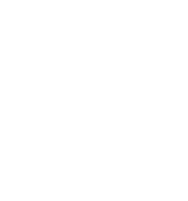

In [26]:
#plt.figure(figsize=(10,8))
#k=2
#for i in range(12):
   # plt.subplot(3, 4, i + 1)
   # plt.axis('off')
   # heatmap, top_index = make_gradcam_heatmap(np.expand_dims(sample_data[k], axis=0), model_vgg_load, last_conv_layer_name, classifier_layer_names)
   # img = np.uint8(255 * sample_data[k])
  #  s_img  = superimposed_img(img, heatmap)
  #  plt.imshow(s_img)
  #  plt.title(labels[np.argmax(sample_label[k])] + " pred as: " + labels[top_index], fontsize=8)
  #  k=k+1